Reading Data and pre-proccessing it:

In [46]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)

X = faces.data
y = faces.target
images = faces.images

print("Total images", len(X))
print("Toatal persons", len(np.unique(y)))

Total images 400
Toatal persons 40


Spliting train/dev(test) sets :

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Uniqe image from persons:

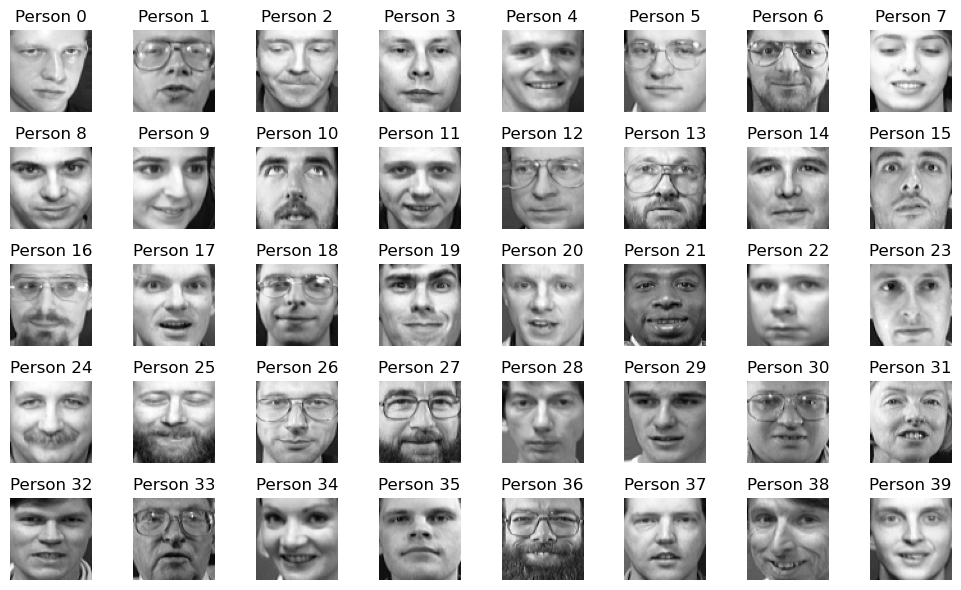

In [48]:
import matplotlib.pyplot as plt

unique_labels = np.unique(y)
fig, axes = plt.subplots(5, 8, figsize=(10, 6))
axes = axes.flatten()

for i, label in enumerate(unique_labels[:40]):
    img = images[y == label][0]
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Person {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

<h1>SVM model</h1>

Training the model:

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Model evaluation:

In [50]:
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.4f}")

SVM Accuracy: 0.9750


<h1>Random Forest model</h2>

Training the model:

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


Model evaluation:

In [52]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")

Random Forest Accuracy: 0.9375


<h1>AdaBoost Model</h1>

Training the model:

In [53]:
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(n_estimators=200, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

Model evaluation:

In [54]:
acc_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {acc_ada:.4f}")

AdaBoost Accuracy: 0.1375


<h1>Comparing this 3 Models:</h1>

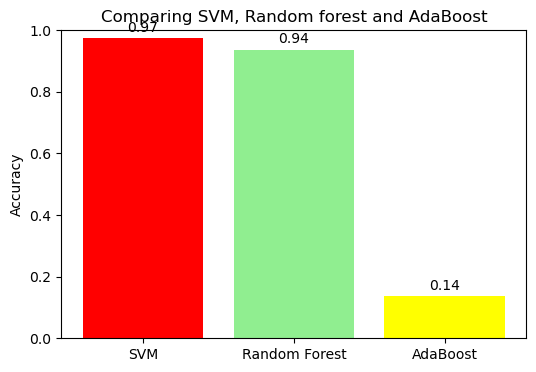

In [55]:
models = ['SVM', 'Random Forest', 'AdaBoost']
accuracies = [acc_svm, acc_rf, acc_ada]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['red', 'lightgreen', 'yellow'])
plt.ylabel('Accuracy')
plt.title('Comparing SVM, Random forest and AdaBoost')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()


<h1>Question??</h1>

<h2>How can we get good results?</h2>

استفاده از شبکه های کانولوشنالی به جای این الگوریتم ها. استفاده از کرنل های غیر خطی. هایپر پارامتر تیونینگ و...